<a href="https://colab.research.google.com/github/PrinceLeBon/RLModel/blob/main/RLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [428]:
# @title Install & import dependencies
!pip install tensorflow-gpu==2.11.0 tensorflow==2.11.0 stable-baselines3 gym-anytrading gym shimmy>=0.2.1

In [429]:
# Gym elements
import gym
import gym_anytrading

# stable baselines
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
import torch as th

#Processing Library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [430]:
# read dataset
df = pd.read_csv("data/gme.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,07/21/2023,23.05,23.22,22.16,22.18,"3,167,916"
1,07/20/2023,23.01,23.22,22.66,22.91,"2,256,659"
2,07/19/2023,23.42,23.58,22.96,23.17,"2,250,133"
3,07/18/2023,22.72,23.80,22.68,23.08,"2,345,137"
4,07/17/2023,22.88,23.31,22.70,22.82,"2,033,970"


In [431]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [432]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [433]:
df.set_index('Date', inplace=True)
df = df.sort_index()
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume
Date,,,,,
2022-07-21,39.93,40.00,37.29,38.37,"9,277,796"
2022-07-22,36.88,38.70,34.93,35.78,"10,060,250"
2022-07-25,35.00,35.51,33.25,33.98,"5,686,259"
2022-07-26,32.87,33.31,32.10,32.43,"4,866,070"
2022-07-27,32.96,34.12,32.16,33.78,"4,251,215"


In [434]:
env = gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)
env.signal_features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/loc

array([[ 3.837e+01,  0.000e+00],
       [ 3.578e+01, -2.590e+00],
       [ 3.398e+01, -1.800e+00],
       [ 3.243e+01, -1.550e+00],
       [ 3.378e+01,  1.350e+00],
       [ 3.384e+01,  6.000e-02],
       [ 3.401e+01,  1.700e-01],
       [ 3.478e+01,  7.700e-01],
       [ 3.584e+01,  1.060e+00],
       [ 3.793e+01,  2.090e+00],
       [ 3.836e+01,  4.300e-01],
       [ 4.002e+01,  1.660e+00],
       [ 4.345e+01,  3.430e+00],
       [ 4.037e+01, -3.080e+00],
       [ 4.053e+01,  1.600e-01],
       [ 3.945e+01, -1.080e+00],
       [ 4.074e+01,  1.290e+00],
       [ 3.968e+01, -1.060e+00],
       [ 4.219e+01,  2.510e+00],
       [ 4.052e+01, -1.670e+00],
       [ 3.793e+01, -2.590e+00],
       [ 3.649e+01, -1.440e+00],
       [ 3.450e+01, -1.990e+00],
       [ 3.353e+01, -9.700e-01],
       [ 3.250e+01, -1.030e+00],
       [ 3.196e+01, -5.400e-01],
       [ 3.094e+01, -1.020e+00],
       [ 3.155e+01,  6.100e-01],
       [ 2.984e+01, -1.710e+00],
       [ 2.864e+01, -1.200e+00],
       [ 2

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the envir

info {'total_reward': -2.1900000000000013, 'total_profit': 0.6661154919182042, 'position': 0}


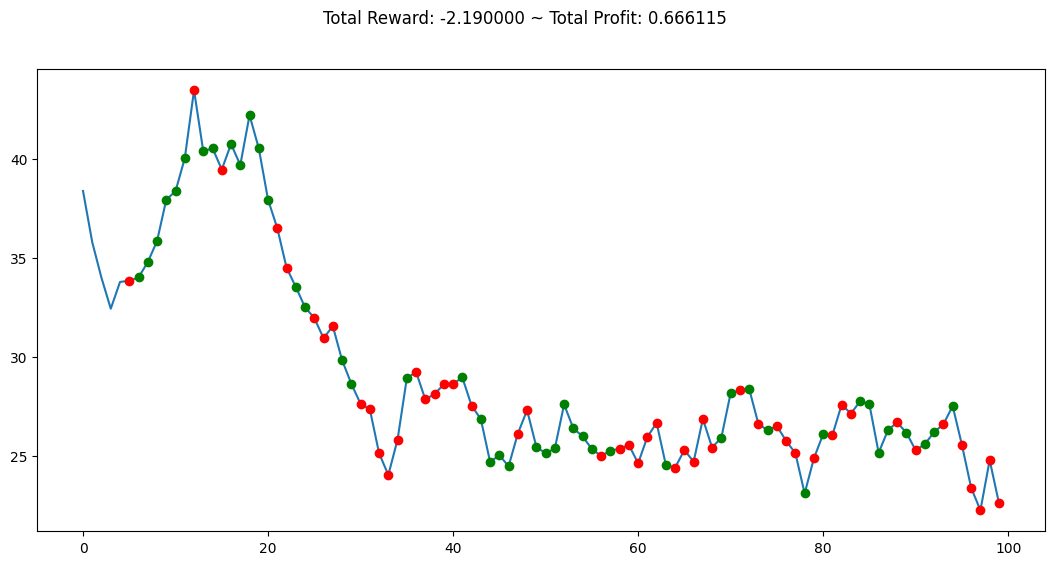

In [435]:
#@title Build environment
state = env.reset()
while True:
  action = env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done:
    print("info", info)
    break
plt.figure(figsize=(13,6))
plt.cla()
env.render_all()
plt.show()


In [436]:
#@title Build Environment and train
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5, len(df)), window_size=5)
env = DummyVecEnv([env_maker])

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [437]:
policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[64, 64])

model = A2C("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=1)
model.learn(total_timesteps=1500)

Using cpu device
-------------------------------------
| time/                 |           |
|    fps                | 817       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.000917 |
|    explained_variance | 0.527     |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -2.5e-05  |
|    value_loss         | 0.029     |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 813       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -1.04e-05 |
|    explained_variance | -0.681    |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | 1.83e-0

info {'total_reward': 0.0, 'total_profit': 1.1598523995535714, 'position': 1}


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/uti

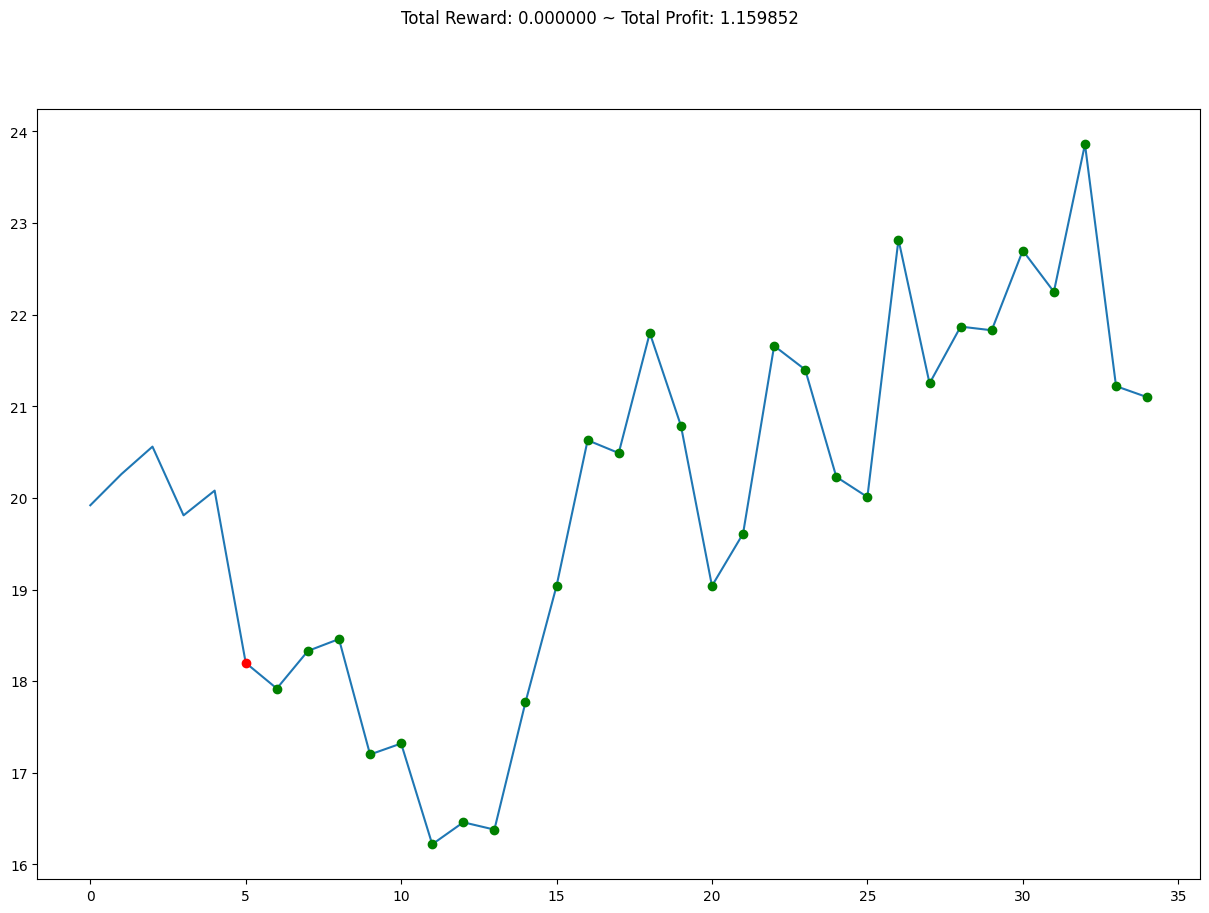

In [438]:
#@title Evaluation
dff = pd.read_csv("data/btc.csv")
dff['Date'] = pd.to_datetime(dff['Date'])
dff.set_index('Date', inplace=True)
dff=dff.sort_index()
dff.head()
env = gym.make('stocks-v0', df=df, frame_bound=(110, 140), window_size=5)
obs = env.reset()
while True:
    #From YT
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,10))
env.render_all()
plt.cla
plt.show()